## **1. Installation**

Load your dataset

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

--2022-04-02 13:55:14--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 188.114.97.3, 188.114.96.3, 2a06:98c1:3120::3, ...
Connecting to pysource.com (pysource.com)|188.114.97.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip.1’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.02s   

2022-04-02 13:55:14 (59.9 MB/s) - ‘Mask_RCNN_basic_1.zip.1’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
replace Mask_RCNN/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Mask_RCNN/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Mask_RCNN/MANIFEST.in? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Mask_RCNN/mrcnn/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Mask_RCNN/mrcnn/model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Mask_RCNN/mrcnn/m_rcnn.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

!nvidia-smi

Sat Apr  2 13:59:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   25C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Image Dataset**

Load your annotated dataset


In [ ]:
# Extract Images
#images_path = "test.zip"
#images_path = "valid.zip"
images_path = "train.zip"

#annotations_path = "_annotations1.coco.json"
annotations_path = "_annotations2.coco.json"
#annotations_path = "_annotations3.coco.json"

extract_images(os.path.join("/content/",images_path), "/content/test")

Extracted: 49 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/test", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/test", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/_annotations2.coco.json
Annotation json path:  /content/_annotations2.coco.json
Train: 44
Validation: 5
Classes: 1


In [ ]:
# Load image samples
#display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
config.display()
model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

  6/500 [..............................] - ETA: 15:14 - loss: 0.0731

Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-2:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiproce

KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220402T1359/mask_rcnn_object_0002.h5
Re-starting from epoch 2


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


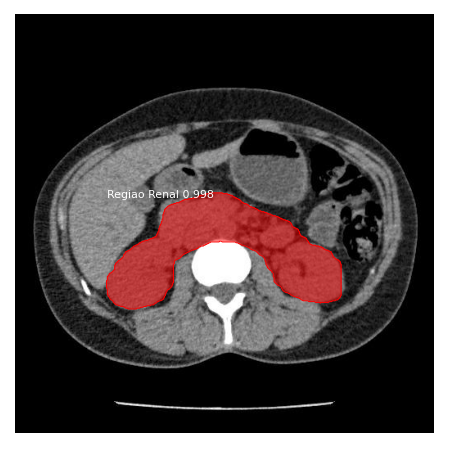

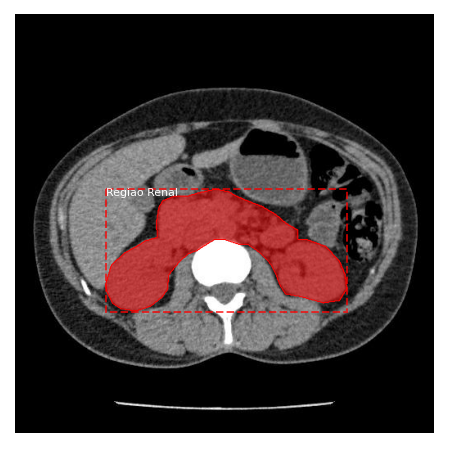

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)



In [ ]:
 # result = []
  #image_ids = np.random.choice(dataset_train.image_ids, 4)
  
  #for image_id in image_ids:
  #  image = dataset_train.load_image(image_id)
  #  mask, class_ids = dataset_train.load_mask(image_id)
  #  visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)
  #  r = test_random_image(test_model, dataset_train, inference_config)
  #  result.append(r)

gt_mask                  shape: (512, 512, 1)         min:    0.00000  max:    1.00000  bool
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
gt_mask                  shape: (512, 512, 1)         min:    0.00000  max:    1.00000  bool
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.7084

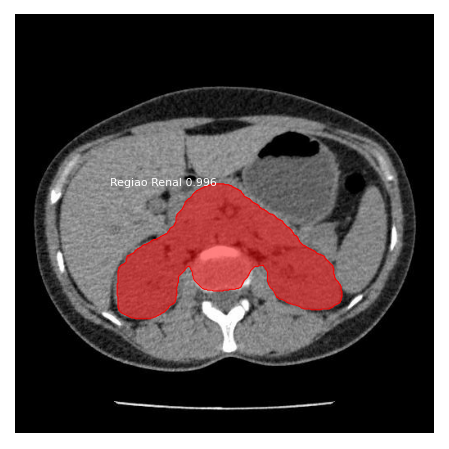

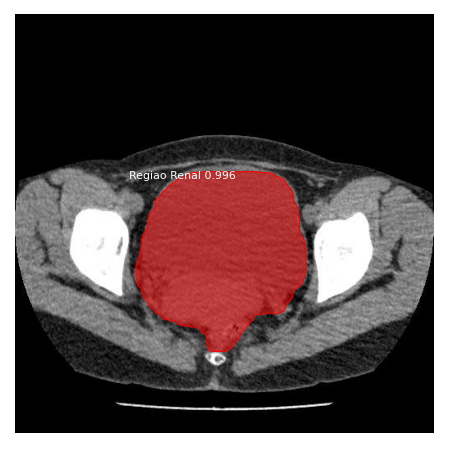

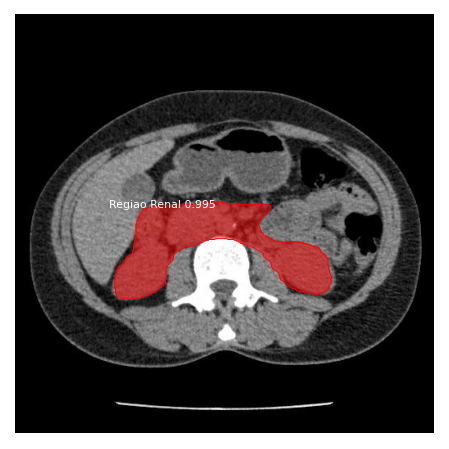

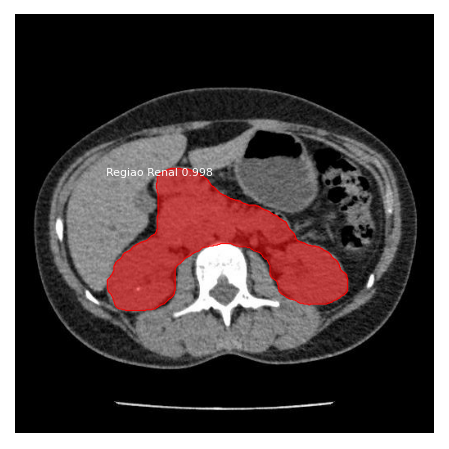

In [ ]:
result1 = []
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
      image_id = random.choice(dataset_train.image_ids)
      original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
      modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)

     #log("original_image", original_image)
    # log("image_meta", image_meta)
    # log("gt_class_id", gt_class_id)
     #log("gt_bbox", gt_bbox)
      log("gt_mask", gt_mask)
      #result.append(gt_mask)

    # Model result
      print("Trained model result")
      results = test_model.detect([original_image], verbose=1)
      #print(results)
      r = results[0]
      #print(r)
      result1.append(r['masks'])
      visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset_train.class_names, r['scores'], ax=get_ax(), show_bbox=False)

      #print("Annotation")
      #visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                               # dataset_train.class_names, figsize=(8, 8))


In [ ]:
results

[{'class_ids': array([1], dtype=int32), 'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]]), 'rois': array([[188, 111, 367, 407]], dtype=int32), 'scores': array([0.9976653], dtype=float32)}]

In [ ]:
result1[0]
len(result1[0])
result1[0].shape


(512, 512, 1)

In [ ]:
import pickle

outfile = open('variaveis','wb')
pickle.dump(result1,outfile)
outfile.close()

In [ ]:
lista = []

for i in result1[0]:
  #print(i)
  lista.extend(np.asarray(i))
#a = np.vstack(result1[0])
#np.reshape(a,(512,512,1))

In [ ]:
np.asarray(lista)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#result = []
#result1 = []
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
      image_id = random.choice(dataset_train.image_ids)
      original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
      modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
      log("original_image", original_image)
    # log("image_meta", image_meta)
    # log("gt_class_id", gt_class_id)
      log("gt_bbox", gt_bbox)
      log("gt_mask", gt_mask)
      
      print("Trained model result")
      results = test_model.detect([original_image], verbose=1)
      r = results[0]
      #u = r ['masks']
      #result.append(u)
      visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset_train.class_names, r['scores'], ax=get_ax(), show_bbox=False)
      visualize.display_images([original_image]+[gt_mask[:,:,i] for i in range(min(gt_mask.shape[-1], 7))])
      #result1.append([gt_mask[:,:,i] for i in range(min(gt_mask.shape[-1], 7))])
      #print("Annotation")
      visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset_train.class_names, figsize=(8, 8))

In [ ]:
r['rois']

array([[188, 111, 367, 407]], dtype=int32)

In [ ]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  mask = np.stack((mask,) * 3, axis = -1)
 
  mask = mask.astype('uint8')
 
  bg = 255 - mask * 255

  mask_show = np.invert(bg)
  mask_img = image * mask

  result = mask_img + bg
  return result, mask_show

In [ ]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))
for index in range(2):
  show_segment(image, r, index, True)

In [ ]:
#tentativa 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.io import imread, imshow, imsave, imread_collection
from tqdm import tqdm
from skimage.color import rgb2gray


resize_i = glob('../input/ultrasoundcorte/cropped/*.bmp')


cla = []
for l, img in enumerate(resize_i):
  for i in range(mask.shape[2]):
    temp = skimage.io.imread(img)
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
        cla.append(temp)
    

In [ ]:
#tentativa
mask = []
for u, ult in enumerate(result):
    mask.append(ult.astype(int))

In [ ]:
#binariza as máscaras que estão em valor bool
mask = r['masks']
mask = mask.astype(int)
mask.shape


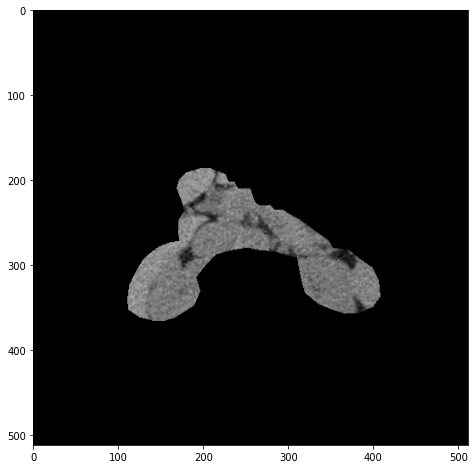

In [ ]:
import skimage
for i in range(gt_mask.shape[2]):
    temp = skimage.io.imread('/content/test/IMG-0001-00046.rf.b29483ec06dec87bb4a45cc678f44140.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * gt_mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)

**Tentativas


In [ ]:
gt_mask.sum()

In [ ]:
#positive_pixel_count = gt_mask.sum() # assumes binary mask (True == 1)
#h, w = gt_mask.shape[1:3] # assumes NHWC data format, adapt as needed
#area = positive_pixel_count / (w*h)

In [ ]:
#for i in range(r['masks'].shape[-1]):
 #   mask = r['masks'][:, :, i]
  #  original_image[mask] = 255
   # original_image[~mask] = 0
    #unique, counts = np.unique(original_image, return_counts=True)
    #mask_area = counts[1] / (counts[0] + counts[1])
    #print(mask_area)

In [ ]:
utils.unmold_mask(gt_mask, gt_bbox, original_image)

In [ ]:
    threshold = 0.5
    for i in range(gt_mask.shape[-1]):
        mask = gt_mask[:, :, i]
        y1, x1, y2, x2 = gt_bbox[i][:4]
            # Resize with bilinear interpolation
        mask = utils.resize(gt_mask, (y2 - y1, x2 - x1))
        mask = np.where(mask >= threshold, 1, 0).astype(np.bool)

        # Put the mask in the right location.
        full_mask = np.zeros(original_image.shape[:2], dtype=np.int)
        full_mask[y1:y2, x1:x2] = mask[:,:,0]

In [ ]:
full_mask.shape

In [ ]:
len(full_mask)

In [ ]:
#**código que imprime a máscara correto
#      image_ids1 = np.random.choice(dataset_train.image_ids, 4)
      
 #     for image_id in image_ids1:      
  #        image_ids = np.random.choice(dataset_train.image_ids, 1)[0]
   #       image_id = random.choice(dataset_train.image_ids)
    #      original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
     #       modellib.load_image_gt(dataset_train, inference_config,
                                  #image_id, use_mini_mask=False)



      #    log("original_image", original_image)
       #   log("image_meta", image_meta)
        #  log("gt_class_id", gt_class_id)
         # log("gt_bbox", gt_bbox)
          #log("gt_bbox", gt_mask)
          #visualize.display_images([original_image]+[gt_mask[:,:,i] for i in range(min(gt_mask.shape[-1], 7))])

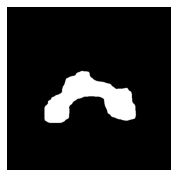

In [ ]:
visualize.display_images(np.transpose(result1[0], [2, 0, 1]), cmap="gray")

In [ ]:
len(mask)

In [ ]:
#import numpy
#X = numpy.array(result1)
#X = np.around(result1).astype(np.int)
#print(np.asarray(X).shape)
#X

In [ ]:
bb = utils.extract_bboxes(gt_mask)

In [ ]:
u = utils.expand_mask(gt_bbox, gt_mask, original_image.shape)

In [ ]:
#import numpy as np
#def binary(gt_bbox, result1, original_image):
#  mask = np.zeros(original_image.shape[:2] + (gt_mask.shape[-1],), dtype=int)
 # for i in range(mask.shape[-1]):
  #  m = gt_mask[:, :, i]
   # y1, x1, y2, x2 = gt_bbox[i][:4]
    #h = y2 - y1
    #w = x2 - x1
        # Resize with bilinear interpolation
    #m = utils.resize(m, (h, w))
    #mask[y1:y2, x1:x2, i] = np.around(m).astype(np.int)
    #return mask

In [ ]:
len(images)

In [ ]:
import numpy as np
mask = np.zeros(original_image.shape[:2] + (gt_mask.shape[-1],), dtype=int)
for i in range(mask.shape[-1]):
   m = gt_mask[:, :, i]
   y1, x1, y2, x2 = gt_bbox[i][:4]
   h = y2 - y1
   w = x2 - x1
        # Resize with bilinear interpolation
   m = utils.resize(m, (h, w))
   mask[y1:y2, x1:x2, i] = np.around(m).astype(np.int)

In [ ]:
mask.shape

In [ ]:
#result = result[:,:,0]

#imageS = []
#for i in result1:
 #   img1 = i > 0
  #  imageS.append(img1)
#test_random_image(test_model, dataset_val, inference_config)

In [ ]:
#imageS[3].shape

In [ ]:
fig, aux = plt.subplots(1,4, figsize=(30,10))
for i in range(0,4):
    aux[i].imshow(result,cmap="gray")

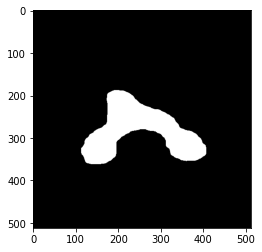

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
for i in result1:
  plt.imshow(np.reshape(i,(512,512)).astype(np.uint8),cmap='gray')



In [ ]:
plt.imsave("mask.png", np.reshape(result1[0],(512,512)).astype(np.uint8))

In [ ]:
cont = 0
for i in result1:
  plt.imsave("img"+ str(cont) + ".png", np.reshape(i,(512,512)).astype(np.uint8))
  cont+=1
